In [1]:
import json
import re

from matplotlib import pyplot as plt
from tqdm import tqdm
import pandas as pd

# INTERMEDIATE RESULTS FROM LOGS
results = []
with open('../data/experiment_results/dump_intermediate_blended_test.txt') as f:
    for line in f:
        if rgx_match := re.search("Results {(.)+}", line):
            res = rgx_match.group(0)[8:].replace("\'", "\"")
            res_dict = json.loads(res)
            results.append(res_dict)
res = pd.DataFrame.from_records(results)
res['nll_diff'] = res['nll_learned'] - res['nll_source']
res = res[res['repetition'] < 16]
res

,case,name,d0,n0,repetition,nll_source,steps_fsp,seqlength,cwlen,iwlen,rankmax,ranknum,d1,n1,nll_learned,kl_divergence,nll_gmm,l2_gmm,nll_diff
0,blended_known,S_3,10,3,2,2.296437,5,1000,3,3,27,1,2,3,2.450142,0.238690,NaN,NaN,0.153705
1,blended_known,S_3,10,3,0,2.292460,5,1000,3,3,27,1,2,3,3.228167,0.652725,NaN,NaN,0.935707
2,blended_known,S_3,10,3,1,2.298817,5,1000,3,3,27,1,2,3,2.404223,0.264886,NaN,NaN,0.105406
3,blended_known,S_3,10,3,2,2.296437,5,1000,3,3,27,1,3,3,2.791243,1.137809,NaN,NaN,0.494806
4,blended_known,S_3,10,3,0,2.292460,5,1000,3,3,27,1,3,3,4.451337,7.395919,NaN,NaN,2.158877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,blended_gmm,S_3,10,3,1,2.298817,5,3162277,2,2,25,3,4,5,4.137629,8.625562,1.630081,0.000052,1.838813
228,blended_gmm,S_3,10,3,1,2.298817,5,3162277,2,2,25,3,5,5,4.459556,9.618889,1.630081,0.000052,2.160739
229,blended_gmm,S_5,10,5,2,2.211232,5,3162277,2,2,25,2,2,5,2.235278,0.063539,1.542191,0.000015,0.024046
230,blended_gmm,S_5,10,5,2,2.211232,5,3162277,2,2,25,2,3,5,2.233728,0.060148,1.542191,0.000015,0.022496


In [1]:
import matplotlib.pyplot as plt
from ipywidgets import Button, HBox, Output
from IPython.display import display
from typing import Callable, Any

class PlotWidget:
    def __init__(self):
        self.current_index = 0
        self.data = None
        self.plotter = None
        self.plotter_kwargs = None
        
        # Create widgets
        self.output = Output()
        self.prev_button = Button(description='← Previous')
        self.next_button = Button(description='Next →')
        self._setup_buttons()
        
    def _setup_buttons(self):
        """Initialize button callbacks and layout"""
        self.prev_button.on_click(self._on_prev_clicked)
        self.next_button.on_click(self._on_next_clicked)
        self.buttons = HBox([self.prev_button, self.next_button])
        
    def _on_prev_clicked(self, b):
        self.current_index = max(0, self.current_index - 1)
        self._update_plot()
        
    def _on_next_clicked(self, b):
        self.current_index = min(len(self.data) - 1, self.current_index + 1)
        self._update_plot()
        
    def _update_plot(self):
        """Clear output and redraw using current index and plotter"""
        self.output.clear_output(wait=True)
        with self.output:
            if self.plotter:
                self.plotter(self.data, self.current_index, **self.plotter_kwargs)
                
    def run(self, data, plotter: Callable[[Any, int], None], **plotter_kwargs):
        """
        Initialize the widget with data and plotting function
        
        Args:
            data: List of items to plot (one per repetition)
            plotter: Function that takes (data_item, index) and creates a plot
        """
        self.data = data
        self.plotter = plotter
        self.plotter_kwargs = plotter_kwargs
        display(self.buttons, self.output)
        self._update_plot()

In [145]:
# 1. Create sample data (20 random walks)
import numpy as np
data = [np.cumsum(np.random.randn(100)) for _ in range(20)]

# 2. Define custom plotter function
def my_plotter(timeseries, index):
    plt.figure(figsize=(8, 4))
    plt.plot(timeseries[index], color='purple', alpha=0.7)
    plt.title(f"Experiment Repetition #{index + 1}")
    plt.xlabel("Time Step")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

# 3. Create and run widget
widget = PlotWidget()
widget.run(data, my_plotter)

Output()

In [3]:
import pandas as pd

In [4]:
res_disc = pd.read_csv('../data/experiment_results/experiment_discrete_all_results_2.csv', index_col=0).drop(['fsp_source', 'fsp_learned'], axis=1).sort_values(['name', 'repetition', 'seqlength'])
res_disc

,case,name,d0,n0,repetition,nll_source,steps_fsp,seqlength,cwlen,iwlen,rankmax,ranknum,d1,n1,nll_learned,kl_divergence,mse
1755,discrete,S_3,10,3,0,1.419933,5,1000,3,3,27,2,2,3,1.461700,0.105348,1.025927e-03
1756,discrete,S_3,10,3,0,1.419933,5,1000,3,3,27,2,3,3,4.248716,23.269573,1.283052e-02
1757,discrete,S_3,10,3,0,1.419933,5,1000,3,3,27,2,4,3,2.141010,3.289432,2.119052e-03
1758,discrete,S_3,10,3,0,1.419933,5,1000,3,3,27,2,5,3,1.712907,0.350846,9.560768e-04
1759,discrete,S_3,10,3,0,1.419933,5,1000,3,3,27,2,6,3,1.910749,0.814075,1.193402e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,discrete,S_5,10,5,9,2.031054,5,10000000,2,2,25,9,10,5,2.044716,0.006851,1.534658e-06
1400,discrete,S_5,10,5,9,2.031054,5,10000000,2,2,25,9,11,5,2.043288,0.012700,9.027927e-07
1401,discrete,S_5,10,5,9,2.031054,5,10000000,2,2,25,9,12,5,2.108580,0.029751,1.291214e-06
1402,discrete,S_5,10,5,9,2.031054,5,10000000,2,2,25,9,13,5,2.801660,0.021035,1.217684e-06


In [5]:
def plot_nll(data: pd.DataFrame, repetition: int, case: str="discrete", name: str="S_3", d1_spec: str="", ylim: tuple=None):
    plotting_data = data.query(f"case=='{case}' & name=='{name}' & repetition=={repetition}" + d1_spec)
    plt.figure(figsize=(8, 4))
    plt.scatter(plotting_data['seqlength'],
                plotting_data['nll_learned'],
                c=plotting_data['d1'],
                alpha=1, zorder=1000)
    plt.axhline(plotting_data['nll_source'].iloc[0], color='red', ls='--')
    plt.title(f"Experiment Repetition #{repetition + 1}")
    plt.xlabel("Time Step")
    plt.ylabel("Value")
    plt.ylim(ylim if ylim is not None else plt.ylim())
    plt.grid(True, zorder=-1000, alpha=0.5)
    plt.xscale('log')
    plt.show()

def plot_kl(data: pd.DataFrame, repetition: int, case: str="discrete", name: str="S_3", d1_spec: str="", ylim: tuple=None):
    plotting_data = data.query(f"case=='{case}' & name=='{name}' & repetition=={repetition}" + d1_spec)
    plt.figure(figsize=(8, 4))
    plt.scatter(plotting_data['seqlength'],
                plotting_data['kl_divergence'],
                c=plotting_data['d1'],
                alpha=1, zorder=1000)
    plt.title(f"Experiment Repetition #{repetition + 1}")
    plt.xlabel("Time Step")
    plt.ylabel("Value")
    plt.ylim(ylim if ylim is not None else plt.ylim())
    plt.grid(True, zorder=-1000, alpha=0.5)
    plt.xscale('log')
    plt.show()

def plot_mse(data: pd.DataFrame, repetition: int, case: str="discrete", name: str="S_3", d1_spec: str="", ylim: tuple=None):
    plotting_data = data.query(f"case=='{case}' & name=='{name}' & repetition=={repetition}" + d1_spec)
    plt.figure(figsize=(8, 4))
    plt.scatter(plotting_data['seqlength'],
                plotting_data['mse'],
                c=plotting_data['d1'],
                alpha=1, zorder=1000)
    plt.title(f"Experiment Repetition #{repetition + 1}")
    plt.xlabel("Time Step")
    plt.ylabel("Value")
    plt.ylim(ylim if ylim is not None else plt.ylim())
    plt.grid(True, zorder=-1000, alpha=0.5)
    plt.xscale('log')
    plt.show()

In [13]:
doomwidget = PlotWidget()
doomwidget.run(res_disc, plot_nll, case="discrete", name="S_5", d1_spec="& d1 == 10", ylim=None)

Output()

In [71]:
res = pd.read_csv('../data/experiment_results/experiment_blended_TEST_results_10.csv', index_col=0).drop(['fsp_source', 'fsp_learned'], axis=1).sort_values(['case', 'name', 'repetition', 'seqlength'])
res['nll_diff'] = res['nll_learned'] - res['nll_source']
res

,case,name,d0,n0,repetition,nll_source,steps_fsp,seqlength,cwlen,iwlen,rankmax,ranknum,d1,n1,nll_learned,kl_divergence,mse,nll_gmm,l2_gmm,nll_diff
43,blended_gmm,S_3,10,3,0,2.307424,5,1000,2,2,16,0,2,4,4.368500,15.644967,2.572158e-08,1.575917,0.000366,2.061076
44,blended_gmm,S_3,10,3,0,2.307424,5,1000,2,2,16,0,3,4,4.227127,22.676699,1.594925e-08,1.575917,0.000366,1.919703
45,blended_gmm,S_3,10,3,0,2.307424,5,1000,2,2,16,0,4,4,3.158677,3.121854,8.126301e-09,1.575917,0.000366,0.851253
49,blended_gmm,S_3,10,3,0,2.307424,5,3162,2,2,36,0,2,6,4.105946,11.147917,4.870995e-08,1.638195,0.000557,1.798521
50,blended_gmm,S_3,10,3,0,2.307424,5,3162,2,2,36,0,3,6,4.215022,11.776952,4.719808e-08,1.638195,0.000557,1.907597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,blended_known,S_5,10,5,2,2.205415,5,3162,2,2,25,0,4,5,2.241265,0.098338,7.560503e-10,NaN,NaN,0.035851
13,blended_known,S_5,10,5,2,2.205415,5,10000,2,2,25,1,2,5,2.246051,0.115660,8.863638e-10,NaN,NaN,0.040636
14,blended_known,S_5,10,5,2,2.205415,5,10000,2,2,25,1,3,5,3.140371,0.150501,8.639602e-10,NaN,NaN,0.934956
15,blended_known,S_5,10,5,2,2.205415,5,10000,2,2,25,1,4,5,2.617944,0.115019,8.343556e-10,NaN,NaN,0.412530


In [72]:
coomwidget = PlotWidget()
coomwidget.run(res, plot_mse, case="blended_gmm", name="S_5", d1_spec="", ylim=None)

Output()

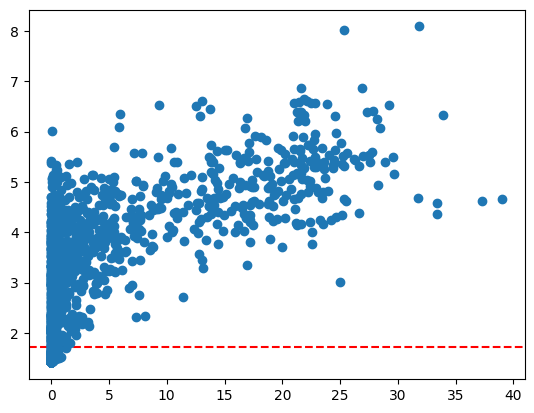

In [19]:
df = res_disc
plt.scatter(df['kl_divergence'], df['nll_learned'])
plt.axhline(df['nll_source'].mean(), ls='--', c='r', zorder=-1)

In [16]:
df = res
plt.scatter(df['l2_gmm'], df['mse'])
# plt.axhline(df['nll_source'].mean(), ls='--', c='r', zorder=-1)

NameError: name 'res' is not defined

Metrics:
- (Ground) NLL of source on test sequence
- NLL of learned model on test sequence
- KL divergence of few-step predictive distributions
- MSE of few-step predictive distributions

- NLL of best GMM on last 10% of training data
- L2 of GMM compared to weights of source over training data